In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Sens = np.genfromtxt('subsfin.txt') # dados dos sensores
Locs = np.genfromtxt('mote_locs.txt') # Coordenadas dos sensores [mote id, x, y]

In [3]:
print(Sens.shape)
print(Locs.shape)

(14400, 52)
(54, 3)


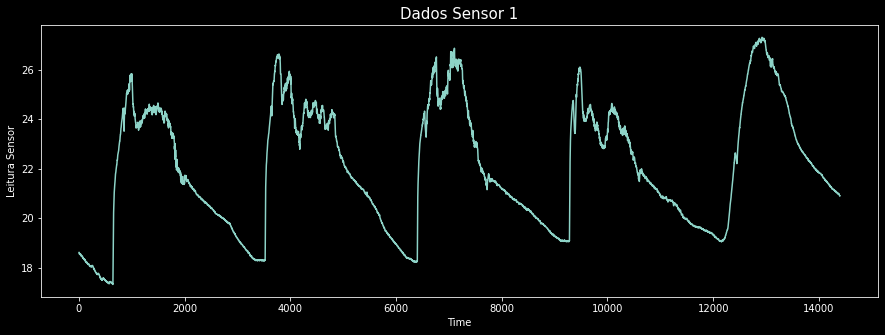

In [4]:
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
plt.plot(Sens[:,0])
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('Dados Sensor 1', fontsize=15)
plt.show()

## 2.1. Tratamento do ruido via alisamento exponencial simples

* Tabelas 1 e 2 (52x10) mostram o erro absoluto médio (MAE) entre a série original e a série alisada para 10 valores de $\alpha$ 
\begin{equation}
    MAE = \frac{1}{N}\sum_{i=1}^{N} |S_i - X_i|
\end{equation}

In [5]:
def MAE(list_st_lisa, list_st_normal):
    lista_erro = []
    for i in range(0, np.shape(list_st_lisa)[0]):
        soma = 0
        for j in range(0 , np.shape(list_st_lisa)[1]):

            soma += abs(list_st_lisa[i][j] - list_st_normal[:,i][j]) 
        erro = (1/len(list_st_lisa)) * soma 
        lista_erro.append(erro)

    return lista_erro

* Tratamento do ruido via alisamento exponencial simples \cite{wiki}} O objetivo deste item é implementar e entender o efeito do alisamento exponencial simples para atenuar o ruido numa série temporal. Seja $S(t)$ a versão alisada da série temporal $X(t), t = 1, ..., N$ onde $N$ é o tamanho da série. Então $S(t)$ é obtida de $X(t)$ pela equação:

\begin{equation}
   S(1) = X(1)  
\end{equation}

\begin{equation}
    S(t) = \alpha X(t) + (1 - \alpha) S(t -1), t = 2, ..., N 
\end{equation}

In [6]:
alfa_valor = [0.157, 0.234, 0.345, 0.456, 0.543, 0.688, 0.734, 0.888, 0.923, 0.999]

list_st_lisa = []
lista_erro_st = []
for i in range(0, len(alfa_valor)): # percorrendo todos os valores de alfa
    
    lista_alisa = []
    
    for j in range(0, Sens.shape[1]): # Percorrendo todos os sensores
        
        list_s = [] #lista criada para cada sensor
        
        list_s.append(Sens[:,j][0]) # pegando primeiro valor da serie
        
        alfa = alfa_valor[i] # pegando o primeiro valor de alfa
        
        for k in range(1, len(Sens[:,0])): # aplicado a formula em serie de um sensor 
            
            s =  (alfa * Sens[:,j][k]) + ((1 - alfa) * list_s[k-1])
            
            list_s.append(s) # Pegando todos os valores de uma serie lisa
            
        lista_alisa.append(list_s) # Pegando todas as series lisas para um alfa
        
    list_st_lisa.append(lista_alisa) # Pegando o daset todo alisado cm um valor de alfa
    erro_st = MAE(lista_alisa, Sens) # Calculando o erro MAE
    lista_erro_st.append(erro_st) # Quando os erros para da alfa
            
    

In [7]:
print(np.array(list_st_lisa).shape)
print(np.array(lista_erro_st).shape)

(10, 52, 14400)
(10, 52)


In [8]:
# Salvando dos dados das tabelas
np.savetxt('test.txt', np.array(lista_erro_st).T, fmt='%4.3f', delimiter='&')

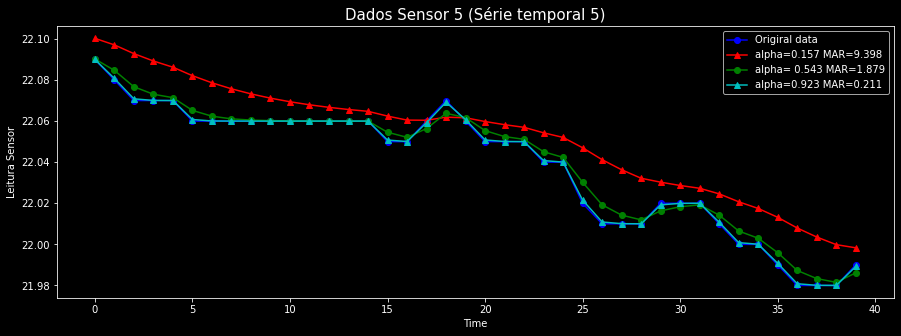

In [9]:
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
plt.plot(Sens[:,4][5000:5040],'bo-', label='Origiral data')
plt.plot(list_st_lisa[0][4][5000:5040],'r^-', 
         label='alpha=0.157 MAR='+str(lista_erro_st[0][4])[:5] )
plt.plot(list_st_lisa[4][4][5000:5040],'go-', 
         label='alpha= 0.543 MAR='+str(lista_erro_st[4][4])[:5] )
plt.plot(list_st_lisa[8][4][5000:5040],'c^-', 
         label='alpha=0.923 MAR='+str(lista_erro_st[8][4])[:5])
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('Dados Sensor 5 (Série temporal 5)', fontsize=15)
plt.savefig("sensor_5.png", bbox_inches='tight')
plt.show()

## 2.2. Determinação da similaridade espacial (entre séries) baseada na matriz de correlação

* Seja X a matriz de dados. As dimensões de $X$ para o dataset dado é 14400 x 52, ou seja, cada coluna de $X$ é uma série temporal. Sejam $m$ o vetor de médias e $v$ o vetor de variâncias das colunas de $X$, ou seja, as médias e as variâncias das séries temporais. As matrizes de correlação R, de covariâncias C e de coeficientes de correlação $Ro$ são dadas por:

\begin{equation}
     R_X = \frac{1}{14400} X'X = \frac{1}{14400} [ R_{ij} = \sum_{k=1}^{14400} X_{ik}X_{jk} ]
\end{equation}

\begin{equation}
    C_X = \frac{1}{14400} (X - m)'(X - m) = \frac{1}{14400} [ C_{ij} = \sum_{k=1}^{14400} (X_{ik} - m_i)(X_{jk} - m_k) ]
\end{equation}

\begin{equation}
    Ro_X = [ Ro_{ij} = \frac{C_{ij}}{\sqrt{v_j}} ]
\end{equation}

In [10]:
# Separando os dados em treinamneto e teste
Xtr = Sens[0:5760] # treinamento
Xte = Sens[5760:14400 ] # teste

In [11]:
R_x = (1/5760) * np.dot(Xtr.T, Xtr)

In [12]:
R_x.shape

(52, 52)

In [13]:
R_x

array([[481.35765319, 475.42056816, 480.41339998, ..., 453.4966258 ,
        442.52103047, 437.94580943],
       [475.42056816, 469.97099073, 474.73167644, ..., 447.89955293,
        436.66363012, 431.97200262],
       [480.41339998, 474.73167644, 479.69985137, ..., 452.72115887,
        441.45063493, 436.70256049],
       ...,
       [453.4966258 , 447.89955293, 452.72115887, ..., 428.82598714,
        417.92602832, 413.17974274],
       [442.52103047, 436.66363012, 441.45063493, ..., 417.92602832,
        408.1488749 , 403.91544773],
       [437.94580943, 431.97200262, 436.70256049, ..., 413.17974274,
        403.91544773, 400.069225  ]])

In [14]:
#  Calculando a matriz de covariancia de acordo com a formula
mean_x = np.mean(Xtr, axis=0)
X_central = Xtr - mean_x
X = Xtr - mean_x
#X = X.T
C_x = (1/5760) * np.dot(X_central.T, X)
print(mean_x.shape)
print(C_x.shape)
C_x

(52,)
(52, 52)


array([[ 6.22785792,  4.76523385,  5.54483379, ...,  6.56810491,
         7.69824287,  8.03146442],
       [ 4.76523385,  3.74797986,  4.33511113, ...,  5.1799119 ,
         5.93571852,  6.10630911],
       [ 5.54483379,  4.33511113,  5.09237063, ...,  6.03836184,
         6.86691539,  7.02458485],
       ...,
       [ 6.56810491,  5.1799119 ,  6.03836184, ...,  8.42485723,
         8.9120973 ,  8.78291427],
       [ 7.69824287,  5.93571852,  6.86691539, ...,  8.9120973 ,
        10.2137033 , 10.47231748],
       [ 8.03146442,  6.10630911,  7.02458485, ...,  8.78291427,
        10.47231748, 11.06742827]])

In [15]:
# Usando o numpy para calcular amtriz de covariancia
cov_x = np.cov(Xtr, rowvar=False)
print(cov_x.shape)
cov_x

(52, 52)


array([[ 6.22893933,  4.7660613 ,  5.5457966 , ...,  6.5692454 ,
         7.6995796 ,  8.03285901],
       [ 4.7660613 ,  3.74863066,  4.33586389, ...,  5.18081135,
         5.9367492 ,  6.10736942],
       [ 5.5457966 ,  4.33586389,  5.09325488, ...,  6.03941035,
         6.86810777,  7.0258046 ],
       ...,
       [ 6.5692454 ,  5.18081135,  6.03941035, ...,  8.42632013,
         8.9136448 ,  8.78443934],
       [ 7.6995796 ,  5.9367492 ,  6.86810777, ...,  8.9136448 ,
        10.21547682, 10.47413591],
       [ 8.03285901,  6.10736942,  7.0258046 , ...,  8.78443934,
        10.47413591, 11.06935003]])

In [16]:
# Calculando o vetor de variância
v = np.var(Sens, axis=0)
print(v.shape)
v

(52,)


array([ 6.08011531,  3.68443746,  4.87891696,  3.92792104,  3.47664106,
        3.57196334,  4.86252731,  5.4572225 ,  4.11872117,  6.99260362,
        8.52616437,  4.2811743 ,  5.90806051,  7.11526938,  5.5167814 ,
        5.91104337,  8.8290685 , 10.05034338, 30.81152776, 24.31464023,
       18.28582887, 26.61450239, 30.78600603, 19.45496506, 15.1119459 ,
       23.95010409, 17.33774485, 21.09755133, 17.17068613, 19.73579147,
       10.06932158,  7.41833106,  5.59642712,  8.35760959,  6.13551322,
       10.16297314,  6.41244067,  9.79127782, 12.3059849 , 12.88957104,
        9.25578194, 10.27962037,  8.13236387,  7.2187468 ,  8.51257493,
        6.27560798,  8.77588163,  9.2301881 ,  7.08990674,  6.99372961,
        7.64647206,  7.84703607])

In [17]:
# Calculando a matriz de coeficente de correção 
Ro_x = []

for i in range(0, 52):
    ro = []
    for j in range(0, 52):
        ro.append(C_x[i][j] / np.sqrt(v[i]*v[j]))
    Ro_x.append(ro)

In [18]:
Ro_x = np.array(Ro_x)
print(Ro_x.shape)
Ro_x

(52, 52)


array([[1.02429931, 1.00679886, 1.01805423, ..., 1.00723255, 1.12902913,
        1.16274909],
       [1.00679886, 1.01724616, 1.02247554, ..., 1.02042798, 1.11829698,
        1.13563918],
       [1.01805423, 1.02247554, 1.04375022, ..., 1.0337202 , 1.12426691,
        1.1352882 ],
       ...,
       [1.00723255, 1.02042798, 1.0337202 , ..., 1.2046301 , 1.21869477,
        1.18558146],
       [1.12902913, 1.11829698, 1.12426691, ..., 1.21869477, 1.33574062,
        1.35194624],
       [1.16274909, 1.13563918, 1.1352882 , ..., 1.18558146, 1.35194624,
        1.410396  ]])

In [19]:
# Função para calcular a similaridade entre as series

def simSetMax3(matriz_sim):
    sim_set_max = []
    sim_set_mim = []
    
    for i in range(0, 52):
        list_max_3 = []
        lis_mim_3 = []
        
        st = list(matriz_sim[i])
        st[i] = 0 # Não pegando os das diagonais principais
        index_max = np.argsort(st)[::-1]
        
        # As 3 mais similares
        list_max_3.append(index_max[0])
        list_max_3.append(index_max[1])
        list_max_3.append(index_max[2])
        
        # As 3 menos similares
        lis_mim_3.append(index_max[50])
        lis_mim_3.append(index_max[49])
        lis_mim_3.append(index_max[48])

        sim_set_max.append(list_max_3) # Pegnado o index da series mais similaries
        sim_set_mim.append(lis_mim_3) # Pegnado o index da series menos similaries

    return sim_set_max, sim_set_mim # Retorna o index das 3 series mais similares entre se
    

In [20]:
# Calculando as 3 seriés mais limilares entre se usando o C_x
sim_max_cx, sim_mim_cx = simSetMax3(C_x)
# Salvando dos dados das tabelas
np.savetxt('sim_max_cx.txt', np.array(sim_max_cx), fmt='%4.f', delimiter='&')
np.savetxt('sim_mim_cx.txt', np.array(sim_mim_cx), fmt='%4.f', delimiter='&')
print(sim_max_cx[24])
print(sim_mim_cx[24])

[18, 22, 21]
[32, 33, 45]


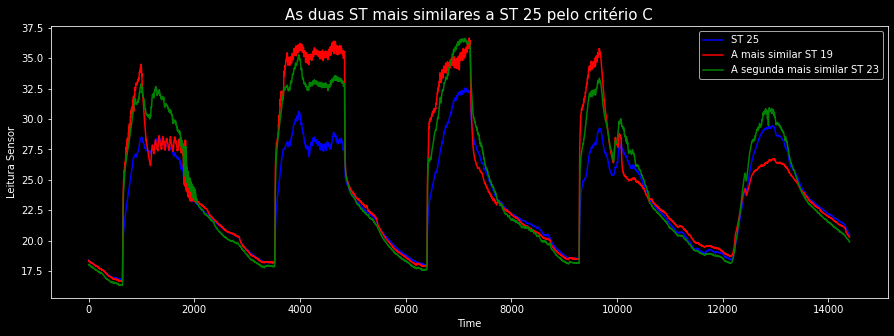

In [21]:
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
plt.plot(Sens[:,24][:],'b', label='ST 25')
plt.plot(Sens[:,18][:],'r', 
         label='A mais similar ST 19')
plt.plot(Sens[:,22][:],'g', 
         label='A segunda mais similar ST 23')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('As duas ST mais similares a ST 25 pelo critério C', fontsize=15)
plt.savefig("rc_max.png", bbox_inches='tight')
plt.show()

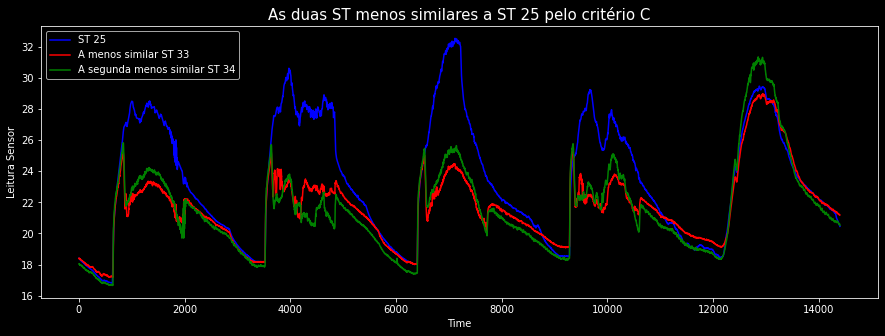

In [22]:
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
plt.plot(Sens[:,24][:],'b', label='ST 25')
plt.plot(Sens[:,32][:],'r', 
         label='A menos similar ST 33')
plt.plot(Sens[:,33][:],'g', 
         label='A segunda menos similar ST 34')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('As duas ST menos similares a ST 25 pelo critério C', fontsize=15)
plt.savefig("rc_max.png", bbox_inches='tight')
plt.show()

In [23]:
# Calculando as 3 seriés mais limilares entre se usando o R_x
sim_max_rx, sim_mim_rx = simSetMax3(R_x)
# Salvando os dados das tabelas
np.savetxt('sim_max_rx.txt', np.array(sim_max_rx), fmt='%4.f', delimiter='&')
np.savetxt('sim_mim_rx.txt', np.array(sim_mim_rx), fmt='%4.f', delimiter='&')
print(sim_max_rx[40])
print(sim_mim_rx[40])

[18, 22, 21]
[47, 51, 50]


In [24]:
# Calculando as 3 seriés mais limilares entre se usando o Ro_x
sim_max_rox, sim_mim_rox = simSetMax3(Ro_x)
np.savetxt('sim_max_rox.txt', np.array(sim_max_rox), fmt='%4.f', delimiter='&')
np.savetxt('sim_mim_rox.txt', np.array(sim_max_rox), fmt='%4.f', delimiter='&')
print(sim_max_rox[4])
print(sim_mim_rox[4])

[9, 11, 10]
[33, 44, 31]


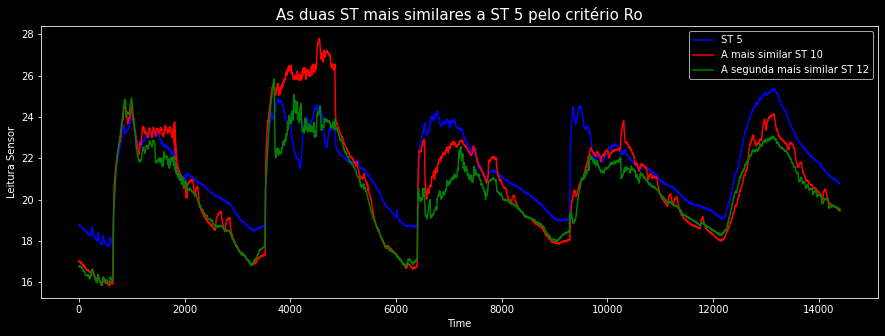

In [25]:
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
plt.plot(Sens[:,4][:],'b', label='ST 5')
plt.plot(Sens[:,9][:],'r', 
         label='A mais similar ST 10')
plt.plot(Sens[:,11][:],'g', 
         label='A segunda mais similar ST 12')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('As duas ST mais similares a ST 5 pelo critério Ro', fontsize=15)
plt.savefig("ro_max.png", bbox_inches='tight')
plt.show()

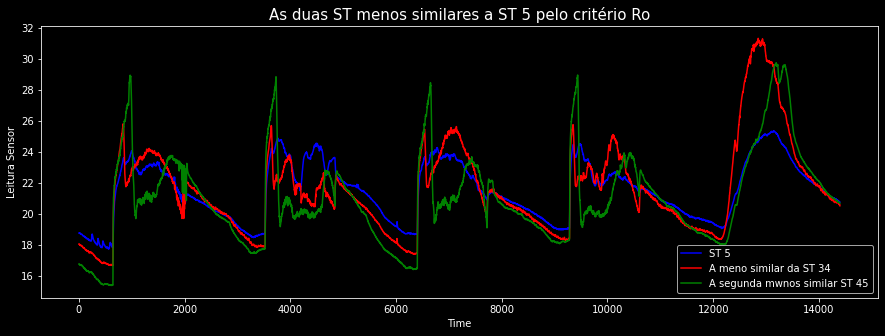

In [26]:
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
plt.plot(Sens[:,4][:],'b', label='ST 5')
plt.plot(Sens[:,33][:],'r', 
         label='A meno similar da ST 34')
plt.plot(Sens[:,44][:],'g', 
         label='A segunda mwnos similar ST 45')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('As duas ST menos similares a ST 5 pelo critério Ro', fontsize=15)
plt.savefig("ro_mim.png", bbox_inches='tight')
plt.show()

## 2.3.1. Imputação com estimação espacial

Na Seção 2.2 foi obtida a lista das três STs mais correlacionadas com cada uma das séries. De forma genérica, sejam  ́$st_{.,u}, st_{.,v} e st_{.,w}$ as STs com maior correlação com $st_{.,i}$. Então forme a matriz $Xtr_i = [st_{.,i}, st_{.,u}, st_{.,v}, st_{.,w}]$, ou seja, as STs são as colunas de $Xtr_i$. Pelo método da subseção 2.2 obtenha $m_i$, o vetor de médias, e $C_{X_i}, i = 1, ..., M$, a matriz de covariâncias. Selecione aleatoriamente 10\\% dos pontos em cada ST do conjunto de teste Xte como pontos ausentes e aplique o Teorema 12.7 para estimar os valores nestes pontos. Construa uma tabela do MAE para os pontos de teste ausentes comparando esta técnica de estimação espacial com as imputações pela média e pela repetiçãoo do ultimo valor recebido. Inclua no relatório tabelas, figuras, códigos e discussão no modelo fornecido para as Seções 2.1 e 2.2.

* Usando o criterio de similaridade $Ro$

In [27]:
# Xte  Dados de teste
# Xtr  Dados de treinamneto 
# As três mais similares usando o Ro sim_max_rox 
# As três mais similares usando o C sim_max_cx 
# As três mais similares usando o R sim_max_rx 


# Função para encontrar a matriz Xtr_i item 2.3.1
def StMax3(Xtr,list_max_sim):
    
    Xtr_i = []
    # Percorrendo as 52 series temporais
    for i in range(0, Xtr.shape[1]):
        # Pegando as 3 mais similares de cada uma das 52 series
        max_st3 = list_max_sim[i]
        # Aqui vai as 4 series temporais [st.,i, st.,u, st.,v, st.,w]
        list_st_sim = []
        # Pgando a serie st.,i
        list_st_sim.append(Xtr[:,i])
        
        # Pegando as series st.,u, st.,v, st.,w
        for j in range(0, len(max_st3)):
            list_st_sim.append(Xtr[:,max_st3[j]-1])
        # Junatdo as lista Xtr_i
        Xtr_i.append(list_st_sim)
    
    return np.array(Xtr_i)

In [28]:
# Criado a matrizes Xtr_i com as três mais similares usando o Ro sim_max_rox 
mat_Xtr_i_Ro = StMax3(Xtr, sim_max_rox)
print(mat_Xtr_i_Ro.shape)
print(mat_Xtr_i_Ro[0].shape)

(52, 4, 5760)
(4, 5760)


In [29]:
print(mat_Xtr_i_Ro[0])

[[18.61 18.6  18.59 ... 19.68 19.68 19.68]
 [18.37 18.39 18.38 ... 19.5  19.49 19.48]
 [15.79 15.78 15.77 ... 16.66 16.66 16.66]
 [17.02 17.01 17.01 ... 17.93 17.93 17.92]]


In [30]:
print(mat_Xtr_i_Ro[1])

[[19.04 19.04 19.03 ... 20.12 20.12 20.09]
 [15.79 15.78 15.77 ... 16.66 16.66 16.66]
 [18.37 18.39 18.38 ... 19.5  19.49 19.48]
 [17.02 17.01 17.01 ... 17.93 17.93 17.92]]


In [31]:
# Função para obter o vetor m_i e matriz Cx_i
# [5760, 4]
def meanM(Xtr_i):
    list_Cx_i = []
    list_mi = []
    for i in range(0, 52):
        Str_i =  Xtr_i[i].T # Transformando para [5760, 4]
        # Encontrado o vetor m_i da Xtr_i
        m_i = np.mean(Str_i, axis=0)
        # Criando a matriz Cx_i
        Str_i_central = Str_i - m_i
        Cx_i = (1/5760) * np.dot(Str_i_central.T, Str_i_central)
        # juntando matriz com todos os Cx_i
        list_Cx_i.append(Cx_i)
        list_mi.append(m_i)
        
    return  np.array(list_Cx_i), np.array(list_mi) # Retorna matriz com todos os Cx_i e m_i

In [32]:
list_Cx_i_Ro, list_mi = meanM(mat_Xtr_i_Ro)
print(list_Cx_i_Ro.shape)

(52, 4, 4)


In [33]:
list_Cx_i_Ro[0]

array([[ 6.22785792,  5.40572275,  8.90178444,  8.10029352],
       [ 5.40572275,  4.98770334,  8.16970899,  7.45483793],
       [ 8.90178444,  8.16970899, 14.28661505, 12.91603008],
       [ 8.10029352,  7.45483793, 12.91603008, 11.77352796]])

In [34]:
list_Cx_i_Ro[1]

array([[ 3.74797986,  6.65595037,  4.12342756,  6.09193574],
       [ 6.65595037, 14.28661505,  8.16970899, 12.91603008],
       [ 4.12342756,  8.16970899,  4.98770334,  7.45483793],
       [ 6.09193574, 12.91603008,  7.45483793, 11.77352796]])

In [35]:
list_Cx_i_Ro[51]

array([[11.06742827, 11.07712378,  7.21367339, 12.24411545],
       [11.07712378, 11.77352796,  7.45483793, 12.91603008],
       [ 7.21367339,  7.45483793,  4.98770334,  8.16970899],
       [12.24411545, 12.91603008,  8.16970899, 14.28661505]])

### Aplicando o teorema 12.7

\begin{equation}
    \\hat{X} = a'Y+b
\end{equation}
\begin{equation}
    Y = [X_1, X_2,X_3]
\end{equation}
\begin{equation}
    a' = C_{X,Y}C_{Y}^{-1}
\end{equation}
\begin{equation}
    b = E[X]-C_{X,Y}C_{Y}^{-1}E[Y] = E[X] - a'E[Y]
\end{equation}

In [36]:
def estimaLinear(mat_cov, mat_m):
    estima_x = []
    for i in range(0, 52): # Quantidade de series
        
        # Encontrado a o valor esperado E[Y] (Media)
        E_Y = mat_m[i][1:] # as medias das tres series mais similares a i
        # Encontrado a matriz de covariancia de CY em C_X
        C_Y = mat_cov[i].copy()
        C_Y =  np.delete(C_Y, [0], axis=0) # removendo a linha de i
        C_Y =  np.delete(C_Y, [0], axis=1) # removendo a coluna de i
        # Encontrado a matriz de covariância cruzada C_x_y com Y = [X1, X2, X3]
        C_x_y = mat_cov[i][1:,0] # Pegando os valores cruzados C_x_y[1, 0], C_x_y[2, 0], C_x_y[3,0]
        # Calculando o coeficiente a'
        a = np.dot(C_x_y, np.linalg.inv(C_Y))
        # Calculando o coeficente b
        
        b = mat_m[i][0] - np.dot(a.T, E_Y)
        
        #(a[0] * mat_m[i][1]) - (a[1] * mat_m[i][2]) - (a[2] * mat_m[i][3])
        
        # Estimando  o valor de X^
        #X = np.dot(a.T, E_Y) + b
        
        estima_x.append([a, b])
    # Retorna os coefientes  de estimativa (a, b) de cada serie
    return estima_x

In [37]:
# Removendo os 10% de cada serie
def imputaData(data_test):
    #np.count_nonzero(np.isnan(data))
    # pegando os 10% de teste
    n = 0.10 * data_test.shape[0]
    rng = np.random.default_rng()
    # Lista para guarda a posicao dos dados imputados
    list_index = []
    # Imptando os dados
    data_imputa = data_test.T.copy()
    for i in range(0, 52):
        # Pegando 10% dos index de forma aleatoria de todas as series 
        indexs = rng.choice(range(4, data_test.shape[0]), size=(int(n)), replace=False)
        for j in range(0, int(n)):
            data_imputa[i][indexs[j]] = None
        
        list_index.append(list(indexs))
    # Retorna os dados de teste com as imputacao e a posicao das imputacao
    return data_imputa, list_index

In [38]:
# Criando os 10% de dados imputados aletoriamente
dados_imput, posi_imput = imputaData(Xte)

In [39]:
# Colculando os coeficientes ('a, b) para todas as series
coe_estima_x = estimaLinear(list_Cx_i_Ro, list_mi)

In [40]:
# Estimendo os valores amputados
def estimaVal(coe_estima, dados_imput, posi_imput, sim_max3, dados_test):
    
    dados_test = dados_test.T # Transformnado para de 5760x52 para 52x5760
    dados_imput_ = dados_imput.copy()
    for i in range(0, 52):
        
        a = coe_estima[i][0] # Coeficiente a 1x3 da serie i
        b = coe_estima[i][1] # Coeficiente b 1x1 ca serie i
        
        st_max3 = [] # as tres series mais similares a serie i
        index_imput = posi_imput[i] # Os index de onde foram imputados os dados da serie i
        # Pegando as 3 series mais similares a i nos dados de teste
        st_max3.append(dados_test[sim_max3[i][0]-1])
        st_max3.append(dados_test[sim_max3[i][1]-1])
        st_max3.append(dados_test[sim_max3[i][2]-1])
        
        # Estimar todos os dados imputados da serie i
        for j in range(0, len(index_imput)):
            # Vetor Y
            Y = []
            # Pegando os 3 valores das series mis similares onde esta faltando dados em i
            #print(max3[0], index_imput[j])
            Y.append(st_max3[0][index_imput[j]])
            Y.append(st_max3[1][index_imput[j]])
            Y.append(st_max3[2][index_imput[j]])
            
            # Estimando o valor cm os coeficentes da serie i
            # Aplicando a formula
            X_i = np.dot(a.T, Y) + b
            
            # Substituido os dados faltosos pela estimativa 
            dados_imput_[i][index_imput[j]] = X_i
            
    # Retornando os dados de teste com os valores imputados substituidos        
    return dados_imput_

In [41]:
# Estimando os novos dados de testes
esti_dados_test = estimaVal(coe_estima_x, dados_imput, posi_imput, sim_max_rox, Xte)

In [42]:
# Calculando o erro 
erro_estima = MAE(esti_dados_test, Xte)
print(erro_estima)

[10.186947323148711, 9.045165376014406, 8.114504536236327, 9.306496433377337, 5.430458880290538, 6.646592792110315, 4.151918869373859, 3.2583427402038807, 3.661344731671516e-13, 1.212021935806171e-13, 8.960353826436264e-14, 3.2247708776804546e-14, 7.799793886447444, 2.7533531010703882e-14, 5.649108157301749, 12.354129100235298, 13.598606641778575, 15.04469695341622, 37.572418186968974, 27.7549748512024, 19.33317869902468, 26.324440253029376, 31.950690571166596, 21.00404694166893, 20.699669467559083, 25.39311669500197, 20.467879626003622, 24.08776629275992, 18.589625571981994, 22.4646978700312, 14.020910509857824, 21.349112382924314, 18.475675036982203, 26.894270040015694, 14.624677908769488, 11.69819290064571, 13.68053829809713, 8.630668114519068, 6.306066779870889e-14, 14.721185330093977, 15.929860060207597, 18.52674329529935, 12.115664472635599, 7.03214287943404, 7.994083698913695, 4.216962218395359, 6.24065525882932, 5.831232932415823e-14, 0.0, 3.750845787810529e-14, 17.502940393735

In [43]:
# Verificando o tamanho da serie estima
len(esti_dados_test[0])

8640

In [44]:
# Verificando se existe algum dado faltando
np.count_nonzero(np.isnan(esti_dados_test[51]))

0

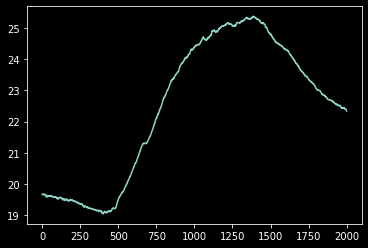

In [45]:
# Serie normal
plt.style.use('dark_background')
plt.plot(Xte[0:,4][6000:8000])

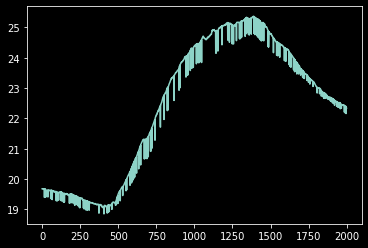

In [46]:
#Serie estima
plt.style.use('dark_background')
plt.plot(esti_dados_test[4][6000:8000])

In [47]:
# Estimativa por media dos dados de treinamento
# Estimativa por valor anterio
def estiMean(ados_imput, index_imput, vetor_medias):
    dodos_esti_mean = ados_imput.copy()
    dodos_esti_valor = ados_imput.copy()
    
    for i in range(0, 52):
        # A media da serie i 
        media_sti = vetor_medias[i][0]
        # Serie i com valores faltosos
        sti_imput = dados_imput[i]
        # Index das posicoes dos dados faltosos de i
        st_index = sorted(index_imput[i])
        
        for j in range(0, len(st_index)):
            # Substituindo os dados pela media
            dodos_esti_mean[i][st_index[j]] = media_sti
            
            # Substituindo pelo valor anterior
            # Varificando se a posicao é 0 e se o valor anterior nao faltoso
            dodos_esti_valor[i][st_index[j]] = dodos_esti_valor[i][st_index[j]-1]
            
            #if st_index[j] == 0 and np.isnan(dodos_esti_valor[i][st_index[j]+1]) == False :
                
                #dodos_esti_valor[i][st_index[j]] = dodos_esti_valor[i][st_index[j]+1]
            
            # se o valor faltoso for na posicao 0 da serie
            #elif st_index[j] > 0:
                #dodos_esti_valor[i][st_index[j]] = dodos_esti_valor[i][st_index[j]-1]
            
            #else:
                #dodos_esti_valor[i][st_index[j]] = dodos_esti_valor[i][st_index[j]+2]
    
    return dodos_esti_valor, dodos_esti_mean

In [48]:
esti_val_anterior, esti_media = estiMean(dados_imput, posi_imput, list_mi)

In [49]:
# Calculando o erro da media
erro_est_media = MAE(esti_media, Xte)
print(erro_est_media)

[34.25624679487181, 26.783440304487165, 30.46740625000001, 24.65535844017092, 24.27075654380338, 23.601095886752177, 27.05732064636751, 30.35254387019237, 27.142203525641015, 28.049536324786324, 31.562215611645282, 21.734584334935843, 28.49240331196577, 31.27642394497864, 29.338279914529892, 31.726066573183683, 41.08781350160257, 40.94061511752139, 70.50446901709395, 62.328241319444516, 55.55951522435903, 68.8483279914529, 78.3807371794872, 61.92470486111115, 56.586595085470044, 69.22543336004271, 58.083586071046945, 66.23168616453006, 54.89881009615381, 61.674782852564114, 43.47722956730778, 38.6828425480769, 33.17275240384616, 40.10922529380343, 33.50002884615386, 43.802267628205094, 36.401242321047, 39.354176282051284, 46.85847495993588, 46.716523370726485, 39.602475894764986, 41.9110829326923, 36.18979927884616, 31.88839743589746, 39.198557425213636, 30.39281089743589, 40.02093215811971, 38.97307331730768, 31.670228165064067, 32.40237119391033, 32.957947115384684, 33.64037927350429

In [50]:
# Calculando o erro com a substituicao com o valor anterior
erro_est_val = MAE(esti_val_anterior, Xte)
print(erro_est_val)

[0.27846153846154015, 0.16269230769230866, 0.22250000000000103, 0.20384615384615368, 0.13346153846153877, 0.17269230769230826, 0.11865384615384701, 0.2105769230769234, 0.1530769230769246, 0.18057692307692186, 0.16403846153846297, 0.20557692307692202, 0.12942307692307878, 0.3259615384615394, 0.22596153846154038, 0.19846153846153847, 0.22000000000000072, 0.22980769230769224, 0.37769230769230616, 0.3050000000000013, 2.598846153846146, 0.33788461538461406, 0.2953846153846156, 0.31961538461538513, 0.2248076923076918, 0.322307692307693, 0.2075000000000012, 0.2792307692307697, 0.2630769230769226, 0.28749999999999903, 0.31538461538461454, 0.25384615384615355, 0.2425000000000006, 0.28730769230769254, 0.21461538461538537, 0.3115384615384618, 0.18846153846153807, 0.2882692307692313, 0.2628846153846161, 0.31673076923076815, 0.23846153846153761, 0.2849999999999988, 0.30211538461538456, 0.2630769230769228, 0.33807692307692144, 0.2455769230769235, 0.32076923076923053, 0.3769230769230778, 0.2990384615

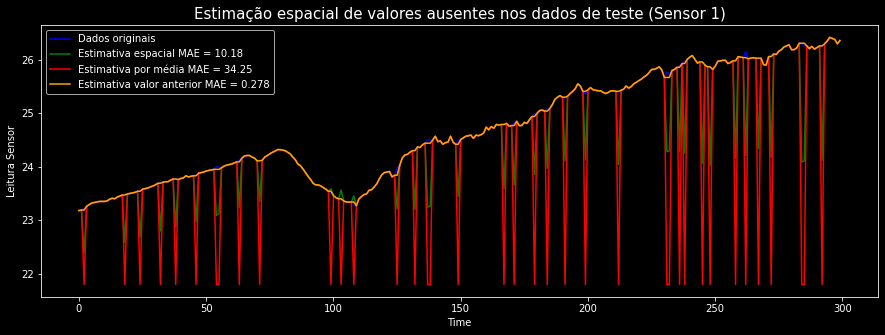

In [51]:
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
plt.plot(Xte[0:,0][700:1000],'b', label='Dados originais')
plt.plot(esti_dados_test[0][700:1000],'g', 
         label='Estimativa espacial MAE = '+str(erro_estima[0])[:5])
plt.plot(esti_media[0][700:1000],'r', 
         label='Estimativa por média MAE = '+str(erro_est_media[0])[:5])

plt.plot(esti_val_anterior[0][700:1000],color='orange', 
         label='Estimativa valor anterior MAE = '+str(erro_est_val[0])[:5])
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('Estimação espacial de valores ausentes nos dados de teste (Sensor 1)', fontsize=15)
plt.savefig("estima_01.png", bbox_inches='tight')
plt.show()

### 2.3.2. Imputação com estimação temporal

Na imputação com estimação temporal, repete-se o mesmo procedimento da subseção 2.3.1 sendo a diferença em como $Xtr_i$ é obtida. Neste caso, $Xtr_i$ e formada por $st_{i,.}$ e

versães de $st_{i,.}$ atrasadas no tempo, ou seja, $Xtr_j = [st_{i,j} , st_{i−1,j} , st_{i−2,j} , st_{i−3,j} ]$. Todo orestante do procedimento é o mesmo da subseção 2.3.1.

In [52]:
# Criando a matriz Xtrj
#i = 0..., 5760
#j = 0..., 52
#Xtrj = Xtr[:,j][i-1]

Xtrj = []
for j in range(0, 52): # As 52 series
    stj = Xtr[:,j]
    st_atra_3 = []
    st_atra_3.append(stj)
    # Os tres valores de atraso
    for k in range(1, 4): #  k = 1, 2, 3
        stj_atra = []
        # 0 a 5760, percorrendo todos os valores da serie
        for i in range(0, stj.shape[0]):
            stj_atra.append(stj[i-k])
        # Pegando a serie atrasada com -1, -2, -3
        st_atra_3.append(stj_atra)
    # Adicionando a serie j e as tres atrasadas
    Xtrj.append(st_atra_3)

In [53]:
np.array(Xtrj).shape

(52, 4, 5760)

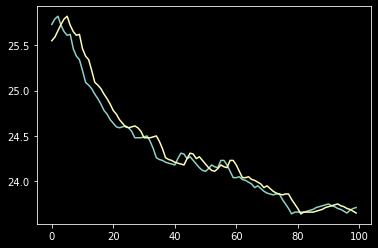

In [54]:
plt.style.use('dark_background')
plt.plot(Xtr[:,0][1000:1100])
plt.plot(Xtrj[0][3][1000:1100])

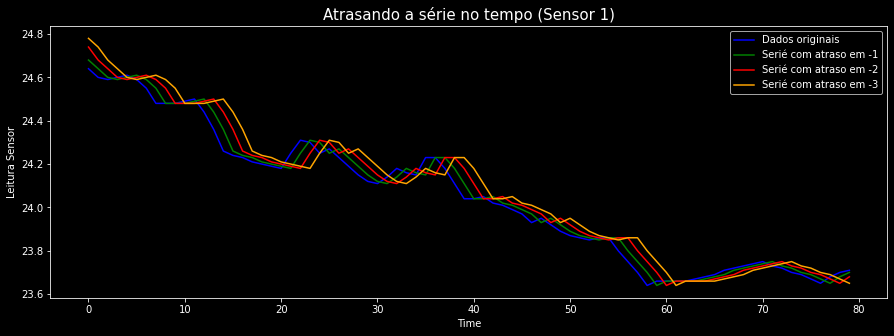

In [55]:
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
plt.plot(Xtrj[0][0][1020:1100],'b', label='Dados originais')
plt.plot(Xtrj[0][1][1020:1100],'g', 
         label='Serié com atraso em -1')
plt.plot(Xtrj[0][2][1020:1100],'r', 
         label='Serié com atraso em -2')

plt.plot(Xtrj[0][3][1020:1100],color='orange', 
         label='Serié com atraso em -3')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('Atrasando a série no tempo (Sensor 1)', fontsize=15)
plt.savefig("atrso_01.png", bbox_inches='tight')
plt.show()

In [56]:
# Criando as matrizes de covariancia da estimacao temporal
Xtrj = np.array(Xtrj)
list_Cx_j_Ro, list_mj = meanM(Xtrj)

In [57]:
list_Cx_j_Ro[0]

array([[6.22785792, 6.22709283, 6.22577365, 6.22411158],
       [6.22709283, 6.22785792, 6.22709283, 6.22577365],
       [6.22577365, 6.22709283, 6.22785792, 6.22709283],
       [6.22411158, 6.22577365, 6.22709283, 6.22785792]])

In [58]:
# Colculando os coeficientes ('a, b) para todas as series 
coe_estima_xj = estimaLinear(list_Cx_j_Ro, list_mj)

In [59]:
# Estimendo os valores amputados
def estTem(coe_estima, dados_imput, posi_imput, sim_max3, dados_test):
    
    dados_test = dados_test.T # Transformnado para de 5760x52 para 52x5760
    dados_imput_ = dados_imput.copy()
    for i in range(0, 52):
        
        a = coe_estima[i][0] # Coeficiente a 1x3 da serie i
        b = coe_estima[i][1] # Coeficiente b 1x1 ca serie i
        
        st_max3 = [] # as tres series mais similares a serie i
        index_imput = sorted(posi_imput[i]) # Os index de onde foram imputados os dados da serie i
        # Pegando as 3 series mais similares a i nos dados de teste
        st_max3.append(dados_test[sim_max3[i][0]-1])
        st_max3.append(dados_test[sim_max3[i][1]-1])
        st_max3.append(dados_test[sim_max3[i][2]-1])
        
        # Estimar todos os dados imputados da serie i
        for j in range(0, len(index_imput)):
            # Vetor Y
            Y = []
            # repetindo os valores para a comtibilidade com os coeficentes espaco-temporal
            
            
            Y.append(dados_imput_[i][index_imput[j]-1])
            Y.append(dados_imput_[i][index_imput[j]-2])
            Y.append(dados_imput_[i][index_imput[j]-3])
            
            # Estimando o valor cm os coeficentes da serie i
            # Aplicando a formula
            X_i = np.dot(a.T, Y) + b
            
            # Substituido os dados faltosos pela estimativa 
            dados_imput_[i][index_imput[j]] = X_i
            
    # Retornando os dados de teste com os valores imputados substituidos        
    return dados_imput_

In [60]:
# Estimando os novos dados de testes (estimacao temporal)
est_temp_dados_test = estTem(coe_estima_xj, dados_imput, posi_imput, sim_max_rox, Xte)